In [2]:
#Importing required packages 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import numpy as np 
import seaborn 
from pprint import pprint 
%matplotlib inline

In [3]:
#Download the data from the UCI website using urllib 
import urllib 
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt") 
raw_data = urllib.request.urlopen(url) 
#The file is a CSV, let's read it into a numpy array 
#Note: not using Pandas to examine/clean the dataset at this point since this dataset is pretty well-cleansed. 
diab = np.genfromtxt(raw_data, delimiter=",") 
#This dataset has 9 columns, 9th one seems to be the labels, 1 or 0 for Diabetes or no Diabetes. 
#Let's split into X,y 
X,y = diab[:,:-1], diab[:,-1:].squeeze() 
#squeeze to flatten the labels into the vector y 
print (X.shape, y.shape) 
#Let's run the train/test split 
X_train, X_test, y_train, y_test = train_test_split(X,y) 

(1372, 4) (1372,)


In [4]:
#Great! now, let's run the kNN classifier with 3 neighbors and see how it does. 
diab_knn = KNeighborsClassifier(n_neighbors=50).fit(X_train, y_train) 
y_pred = diab_knn.predict(X_test) 
y_train_pred = diab_knn.predict(X_train) 
#Let's get the score summary 
print ("Results with 50 Neighbors") 
print (metrics.classification_report(y_test, y_pred, target_names=['Fake Banknote', 'Real Banknote'])) 
print (metrics.classification_report(y_train, y_train_pred, target_names=['Fake Banknote', 'Real Banknote'])) 
#So we had a training accuracy of 84% but only a test accuracy of 72% 
#The precision/recall metrics tell us out of each category (No Diabetes or Diabetes) how many we predicted right.

Results with 50 Neighbors
               precision    recall  f1-score   support

Fake Banknote       1.00      0.98      0.99       199
Real Banknote       0.97      1.00      0.99       144

  avg / total       0.99      0.99      0.99       343

               precision    recall  f1-score   support

Fake Banknote       1.00      0.98      0.99       563
Real Banknote       0.97      1.00      0.99       466

  avg / total       0.99      0.99      0.99      1029



In [5]:
#OK, not so great so far. Let's see if we can improve the score by increasing neighbors. 
diab_knn = KNeighborsClassifier(n_neighbors=100).fit(X_train, y_train) 
y_pred = diab_knn.predict(X_test) 
y_train_pred = diab_knn.predict(X_train) 
#Let's get the score summary 
print ("Results with 100 Neighbors") 
print (metrics.classification_report(y_test, y_pred, target_names=['Fake Banknote', 'Real Banknote'])) 
print (metrics.classification_report(y_train, y_train_pred, target_names=['Fake Banknote', 'Real Banknote'])) 
#OK we did ever so slightly better on the test set but did much poorly on the Training set. 
#If we continue to tune in this fashion, we will end up biasing our model based on the Test set. 
#Trying out even more number of neighbors, turns out our first choice of neighbors=3 is actually the best, 
#Is there any other setting we could play with? 

Results with 100 Neighbors
               precision    recall  f1-score   support

Fake Banknote       0.99      0.97      0.98       199
Real Banknote       0.96      0.99      0.98       144

  avg / total       0.98      0.98      0.98       343

               precision    recall  f1-score   support

Fake Banknote       0.99      0.96      0.97       563
Real Banknote       0.95      0.98      0.97       466

  avg / total       0.97      0.97      0.97      1029



In [6]:
#OK, not so great so far. Let's see if we can improve the score by increasing neighbors. 
diab_knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train) 
y_pred = diab_knn.predict(X_test) 
y_train_pred = diab_knn.predict(X_train) 
#Let's get the score summary 
print ("Results with 5 Neighbors") 
print (metrics.classification_report(y_test, y_pred, target_names=['Fake Banknote', 'Real Banknote'])) 
print (metrics.classification_report(y_train, y_train_pred, target_names=['Fake Banknote', 'Real Banknote'])) 
#OK we did ever so slightly better on the test set but did much poorly on the Training set. 
#If we continue to tune in this fashion, we will end up biasing our model based on the Test set. 
#Trying out even more number of neighbors, turns out our first choice of neighbors=3 is actually the best, 
#Is there any other setting we could play with? 

Results with 5 Neighbors
               precision    recall  f1-score   support

Fake Banknote       1.00      1.00      1.00       199
Real Banknote       1.00      1.00      1.00       144

  avg / total       1.00      1.00      1.00       343

               precision    recall  f1-score   support

Fake Banknote       1.00      1.00      1.00       563
Real Banknote       1.00      1.00      1.00       466

  avg / total       1.00      1.00      1.00      1029



In [7]:
#Below is a plot_learning_curve module that's provided by scikit-learn. It allows us to quickly and easily visualize how 
#well the model is performing based on number of samples we're training on. It helps to understand situations such as 
#high variance or bias. 
#We'll call this module in the next segment. 
print(__doc__) 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import cross_validation 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.datasets import load_digits 
from sklearn import model_selection 
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)): 
    """ 
    Generate a simple plot of the test and traning learning curve. 
    Parameters ---------- 
    estimator : object type that implements the "fit" and "predict" methods 
    An object of that type which is cloned for each validation. 
    title : string Title for the chart. 
    X : array-like, shape (n_samples, n_features) 
    Training vector, where n_samples is the number of samples and 
    n_features is the number of features. 
    y : array-like, shape (n_samples) or (n_samples, n_features), optional 
    Target relative to X for classification or regression; 
    None for unsupervised learning. 
    ylim : tuple, shape (ymin, ymax), optional 
    Defines minimum and maximum yvalues plotted. 
    cv : integer, cross-validation generator, optional 
    If an integer is passed, it is the number of folds (defaults to 3). 
    Specific cross-validation objects can be passed, see 
    sklearn.cross_validation module for the list of possible objects 
    n_jobs : integer, optional 
    Number of jobs to run in parallel (default 1). 
    """ 
    plt.figure() 
    plt.title(title) 
    if ylim is not None: 
        plt.ylim(*ylim) 
    plt.xlabel("Training examples") 
    plt.ylabel("Score") 
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) 
    train_scores_std = np.std(train_scores, axis=1) 
    test_scores_mean = np.mean(test_scores, axis=1) 
    test_scores_std = np.std(test_scores, axis=1) 
    plt.grid() 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r") 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g") 
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score") 
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score") 
    plt.legend(loc="best") 

Automatically created module for IPython interactive environment


C:\Users\morgan.s.hoover\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')


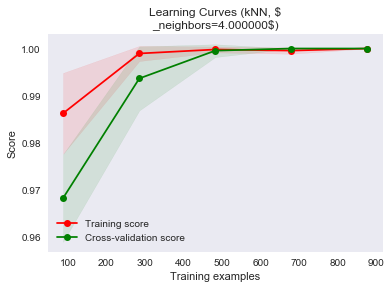

In [8]:
from sklearn.model_selection import learning_curve
#Let's try one last technique of creating a cross-validation set. Like I mentioned earlier, when you tune parameters 
#based on Test results, you could possibly end up biasing your model based on Test. Although this may not be an issue 
#in many instances, you could create a cross validation set to avoid this. 
#Luckily scikit-learn has builit-in packages that can help with this. We'll use a crossvalidation generator that 
#can train the model by tuning the parameters based on a cross-validation subset (cv) that is picked from within the training 
#set. A different cv subset will be picked for each iteration, we control the number of iterations. Then we will use these 
#cv/train splits and run a gridsearch function that will evaluate the model with each split and tune parameters to give us 
#the best parameter that gives the optimal result. 
#OK let's now follow these steps to implement the above and see if it makes any difference to the result 
#80/20 test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
#Choose Estimator as KNN 
estimator = KNeighborsClassifier(n_neighbors=3) 
#Choose cross-validation generator - let's choose ShuffleSplit which randomly shuffles and selects Train and CV sets 
#for each iteration. There are other methods like the KFold split. 
from sklearn.cross_validation import ShuffleSplit 
#cv = KFold(X_train.shape[0]) 
cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2, random_state=0) 
#Apply the cross-validation iterator on the Training set using GridSearchCV. This will run the classifier on the 
#different train/cv splits using parameters specified and return the model that has the best results 
#Note that we are tuning based on the F1 score 2PR/P+R where P is Precision and R is Recall. This may not always be 
#the best score to tune our model on. I will explore this area further in a seperate exercise. For now, we'll use F1. 
from sklearn.model_selection import GridSearchCV 
classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=dict(n_neighbors=[2,3,4,5]), scoring='f1') 
#Also note that we're feeding multiple neighbors to the GridSearch to try out. 
#We'll now fit the training dataset to this classifier 
classifier.fit(X_train, y_train) 
#Let's look at the best estimator that was found by GridSearchCV 
print (classifier.best_estimator_) 
#Let's look at the learning curve for our model based on number of training examples. We'll call the plot_learning_curve 
#module by feeding it the estimator (best estimator returned from GS) and train/cv sets. 
#The module simply runs the estimator multiple times on subsets of the data provided and plots the train and cv scores. 
from sklearn import model_selection  
title = 'Learning Curves (kNN, $\n_neighbors=%.6f$)' %classifier.best_estimator_.n_neighbors 
estimator = KNeighborsClassifier(n_neighbors=classifier.best_estimator_.n_neighbors) 
plot_learning_curve(estimator, title, X_train, y_train, cv=cv) 
plt.show() 
#Great, we see that as the number of training samples increases, both training and cv scores are on the rise. This is 
#a good sign. If training score rose but cv score fell that would indicate high variance (overfitting). If both train and cv 
#scores are low that would indicate high bias (underfitting).

Accuracy Score:  1.0
The optimal number of neighbors is 5


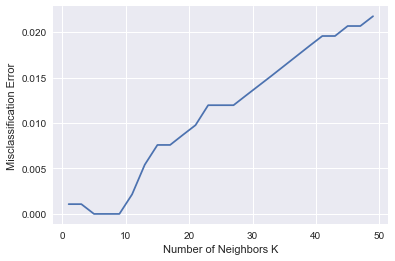

In [11]:
# loading libraries
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import pandas as pd
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt', sep=',',header=None)
df.values

#Our dataset and targets
X = df.values[:,0:4]
y = df.values[:,4]

# # create design matrix X and target vector y
# X = np.array(df.ix[:, 0:4]) 	# end index is exclusive
# y = np.array(df['class']) 	# another way of indexing a pandas df

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print ("Accuracy Score: ", accuracy_score(y_test, pred))
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [10]:
#Let's finally predict the Test labels and look at the final scores. Remember we've not touched our test set so far. This is 
#to get a good grip on how well the model will generalize. 
y_pred = classifier.predict(X_test) 
print ("Final Classification Report") 
print (metrics.classification_report(y_test, y_pred)) 
print ("Generalization Accuracy: %.6f" %metrics.accuracy_score(y_test,y_pred)) 

Final Classification Report
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       157
        1.0       1.00      1.00      1.00       118

avg / total       1.00      1.00      1.00       275

Generalization Accuracy: 1.000000
